This notebook deals with the orbits of all the close stars ($d \leq 8\, kpc$)

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})
#from astropy.visualization import astropy_mpl_style
#plt.style.use(astropy_mpl_style)
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits, ascii
from astropy.table import Table, Column, vstack, hstack

import MagellanicStream as ms

import warnings
warnings.filterwarnings('ignore')

import galpy as gp
from galpy.potential import MWPotential2014, plotPotentials, plotDensities, plotRotcurve, MiyamotoNagaiPotential
from galpy.orbit import Orbit

In [3]:
#import data for 51 closest stars
heir = fits.getdata('/Users/joshpovick/Desktop/Research/fits/MS_youngfits/heir.fits',1)

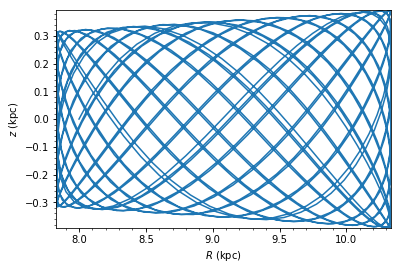

In [4]:
#testing example code from documentation
o= Orbit(vxvv=[1.,0.1,1.1,0.,0.1],ro=8.,vo=220.)
ts= np.linspace(0,100,1000)
o.integrate(ts,MWPotential2014,method='odeint')
o.plot()

In [5]:
#Convert to cylindrical coordinates !!!Not Used!!!
from astropy.coordinates import Distance

def cart2cyl(x, y, z):
    r = np.sqrt(np.square(x)+np.square(y))
    phi = np.arctan(np.divide(y,x))
    return r,phi,z

galact = []
for i in range(len(heir)):
    cr = coord.ICRS(ra=heir['RA'][i]*u.degree, dec=heir['DEC'][i]*u.degree, \
                        distance=Distance(parallax=(heir['parallax'][i]+0.052)*u.mas,allow_negative=True),\
                        pm_ra_cosdec=heir['pmra'][i]*u.mas/u.yr,\
                        pm_dec=heir['pmdec'][i]*u.mas/u.yr,
                        radial_velocity=heir['VLSR'][i]*u.km/u.s)
    gcoor = cr.transform_to(coord.Galactocentric)
    galact.append(gcoor)

    
#the following is unused 
galx = [] 
galy = []
galz = []
velx = []
vely = []
velz = []
for i in range(len(galact)):
    galx.append(galact[i].x.value*(1/1000.))
    galy.append(galact[i].y.value*(1/1000.))
    galz.append(galact[i].z.value*(1/1000.))
    velx.append(galact[i].v_x.value)
    vely.append(galact[i].v_x.value)
    velz.append(galact[i].v_x.value)
    
galr,galphi,galz = cart2cyl(galx,galy,galz)
velr,velphi,velz = cart2cyl(velx,vely,velz)

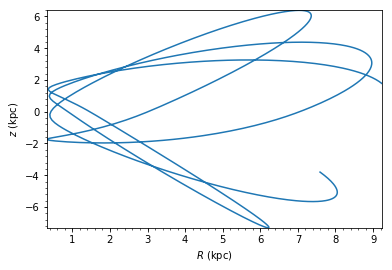

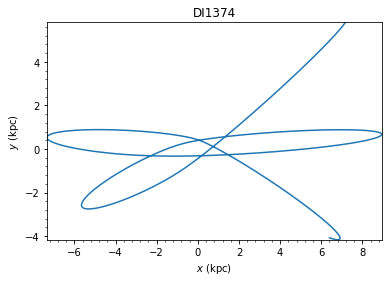

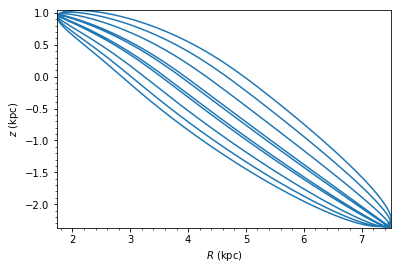

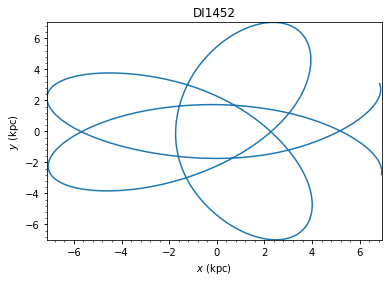

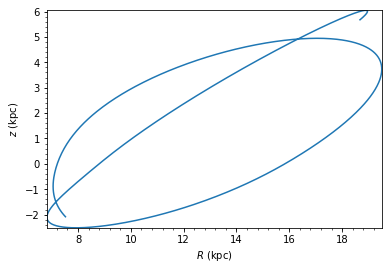

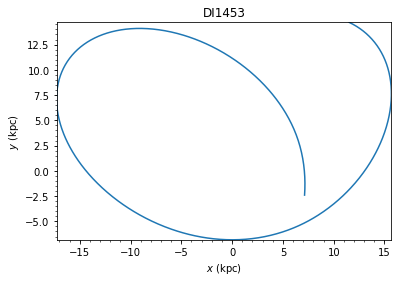

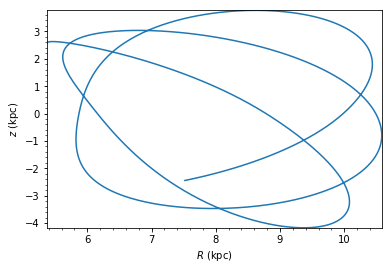

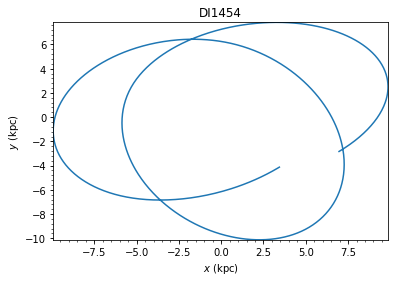

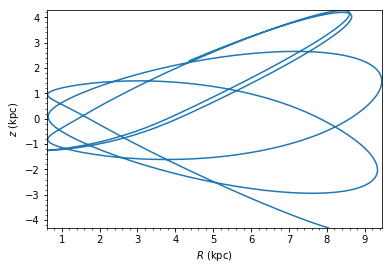

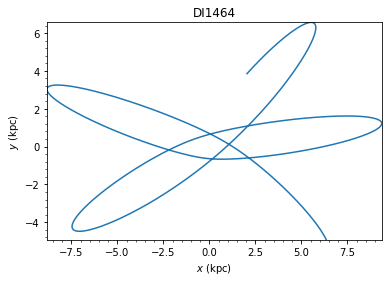

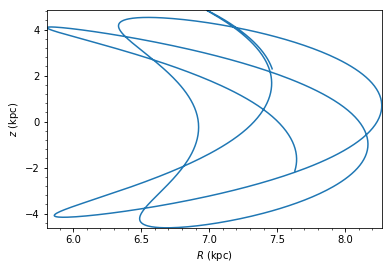

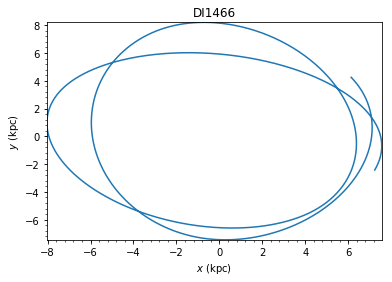

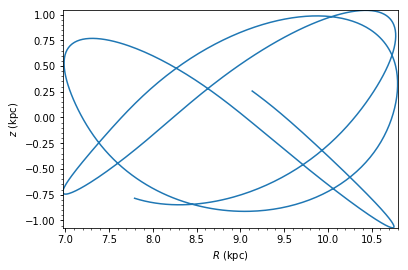

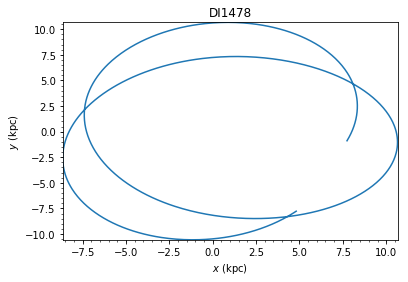

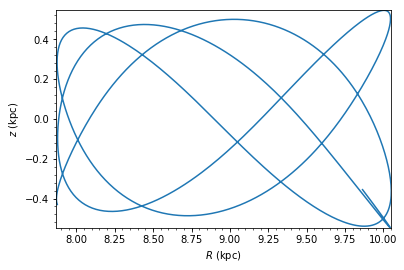

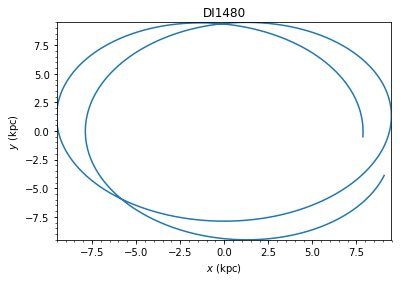

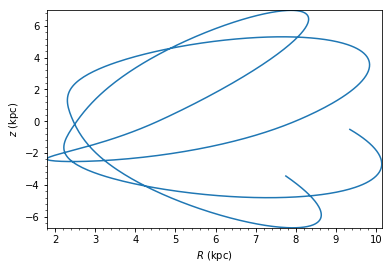

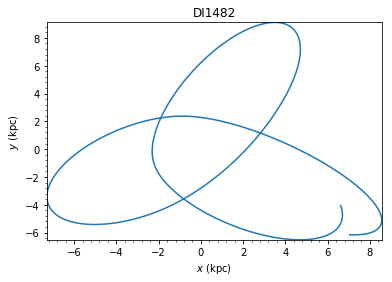

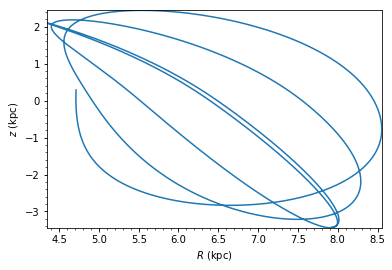

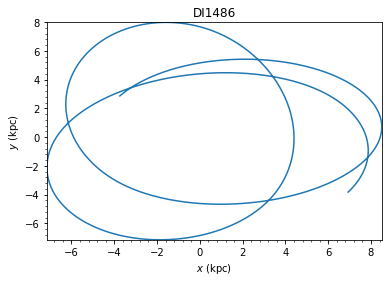

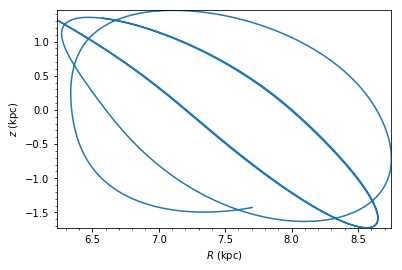

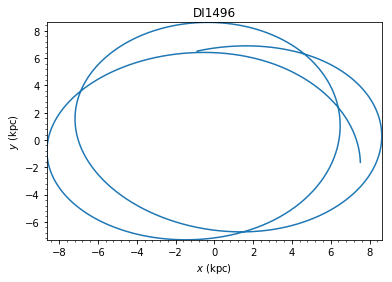

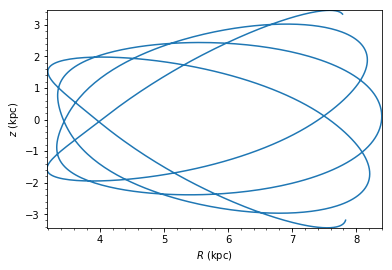

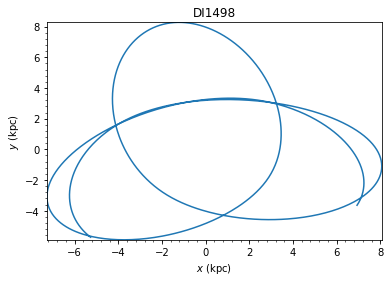

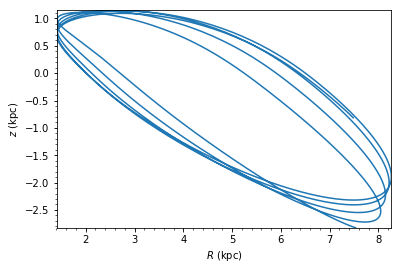

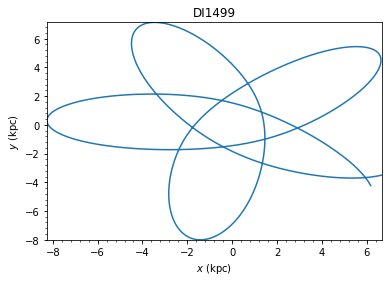

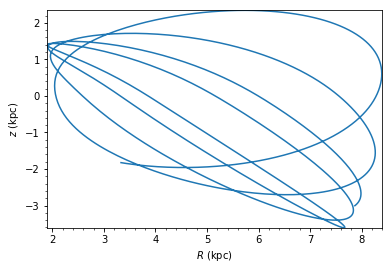

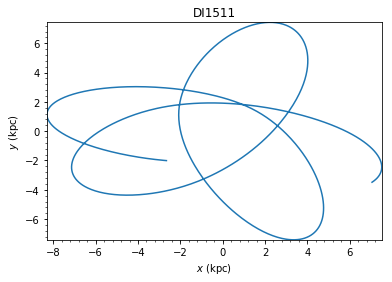

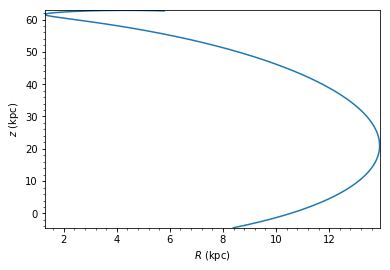

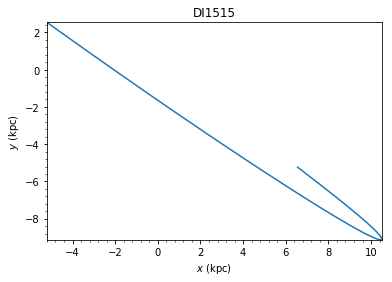

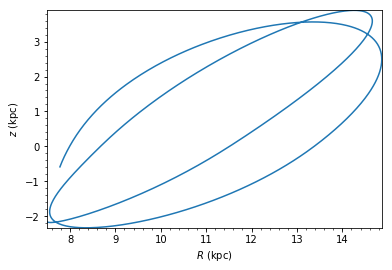

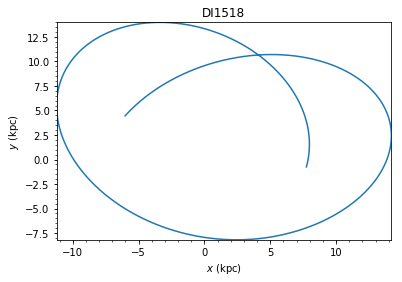

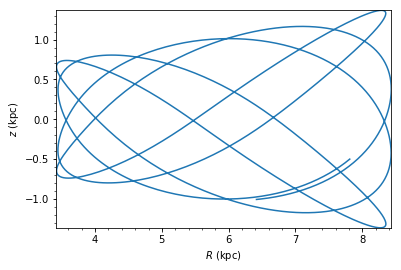

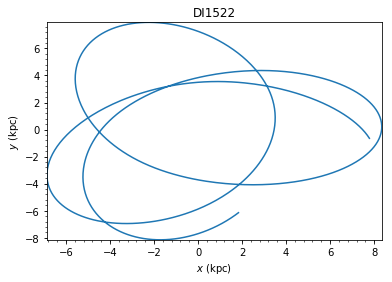

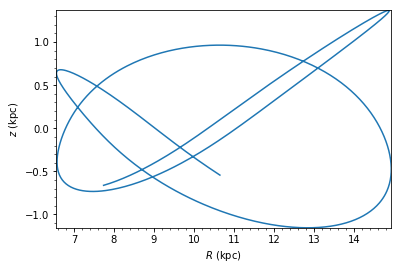

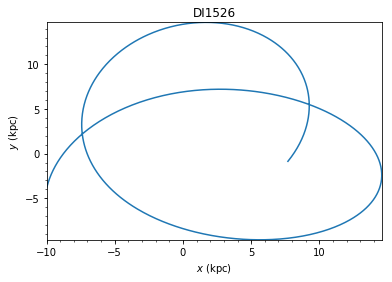

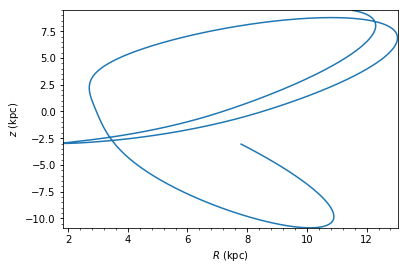

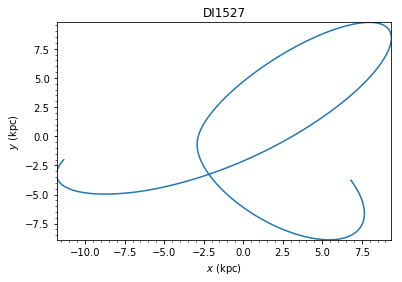

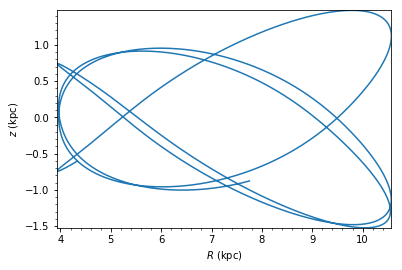

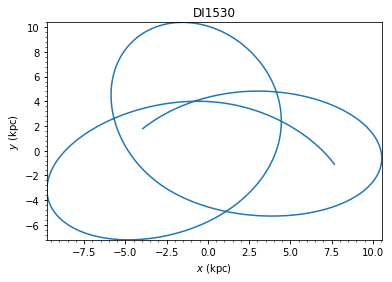

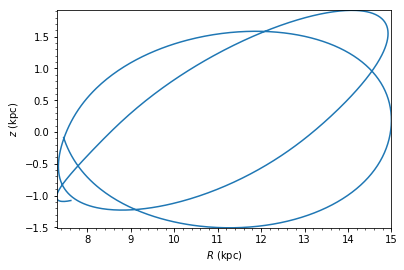

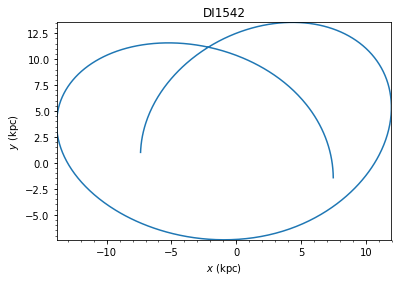

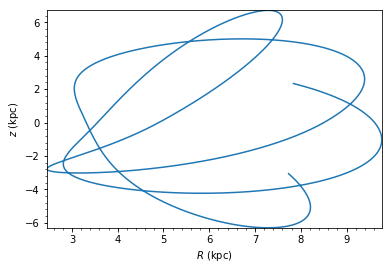

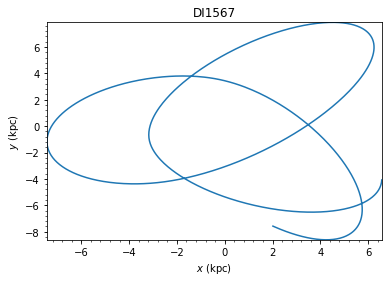

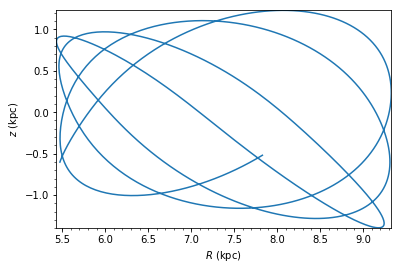

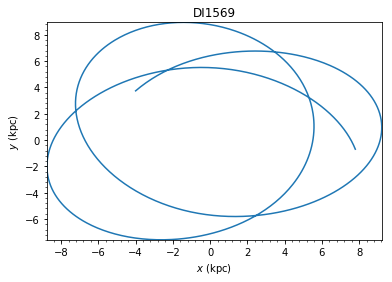

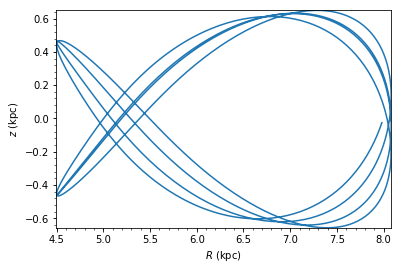

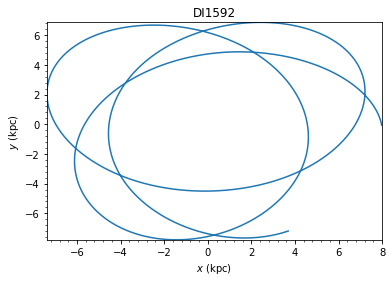

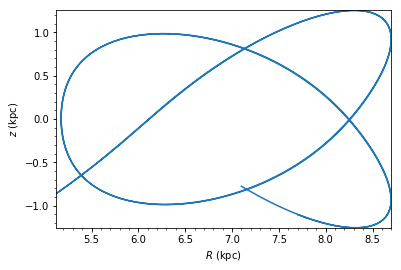

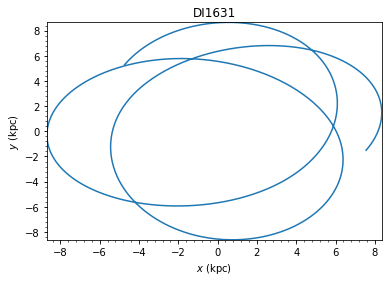

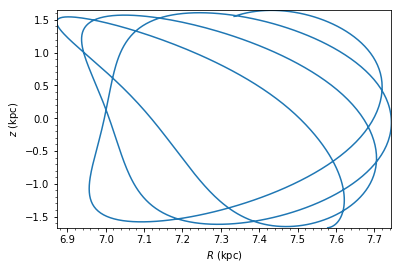

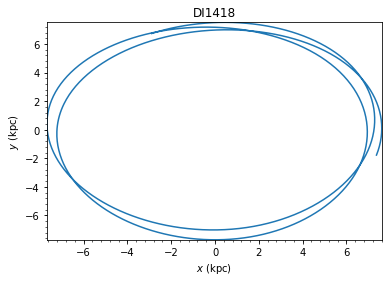

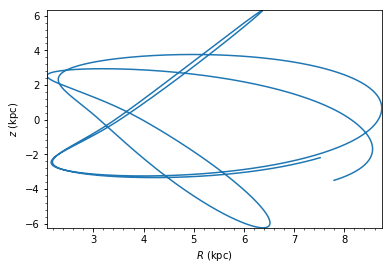

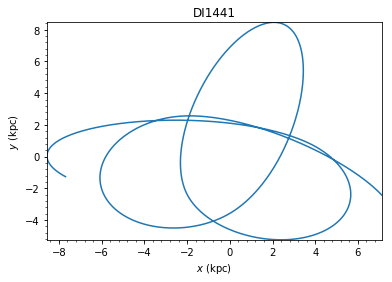

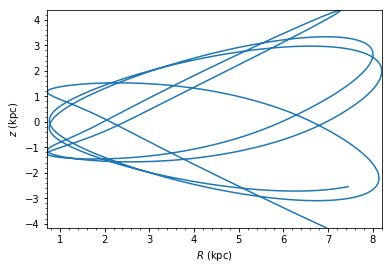

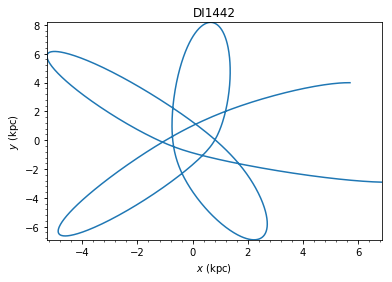

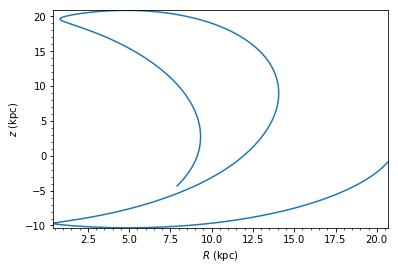

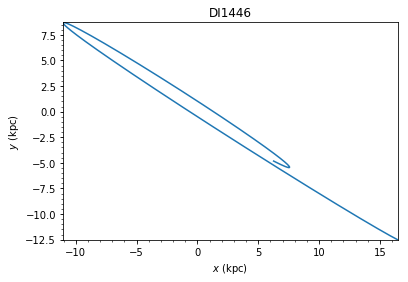

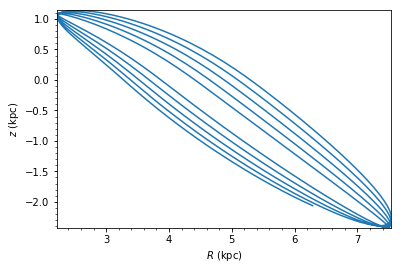

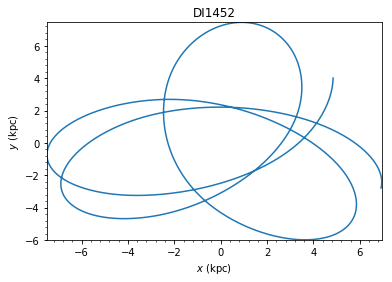

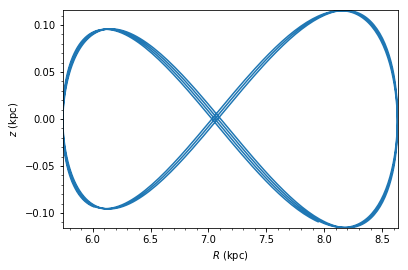

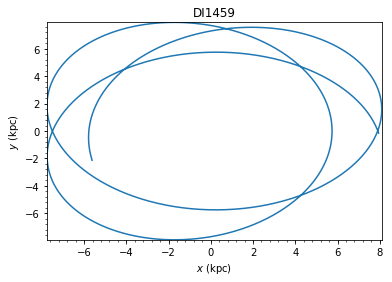

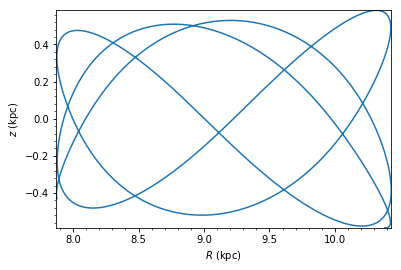

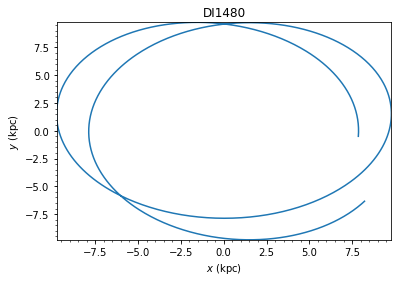

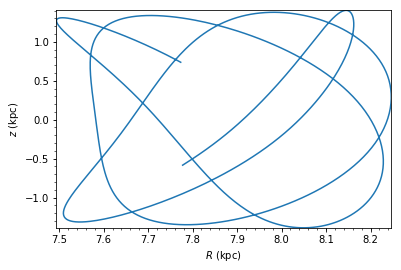

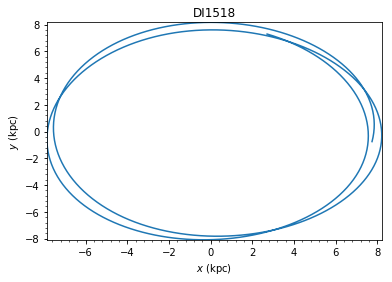

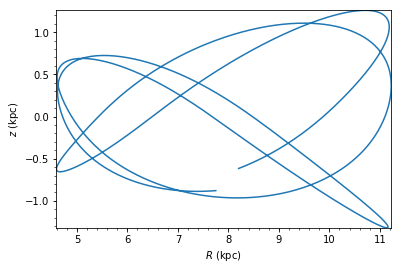

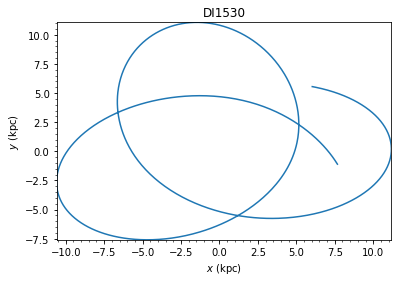

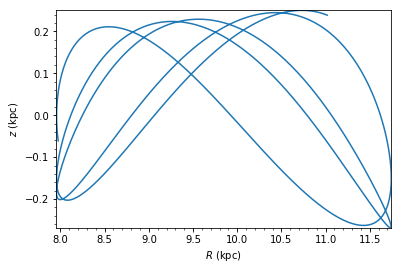

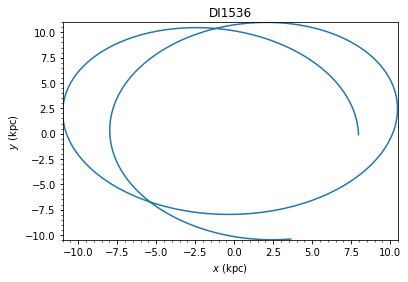

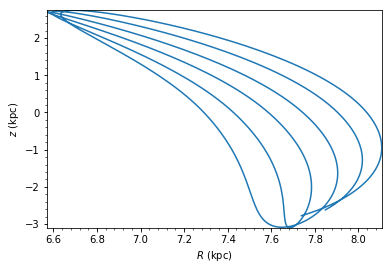

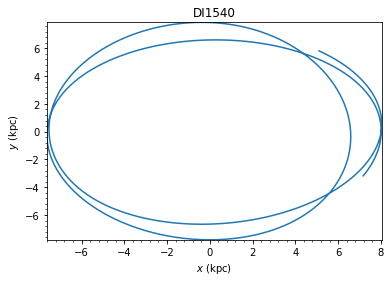

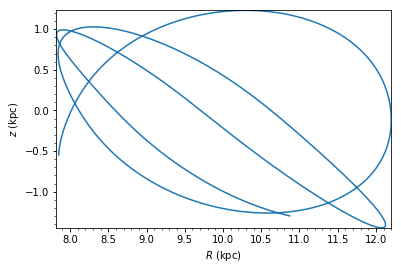

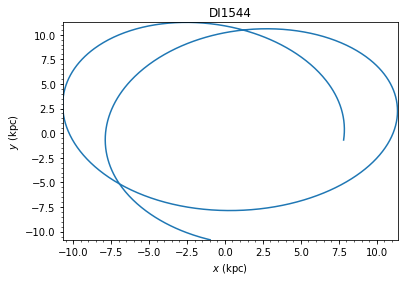

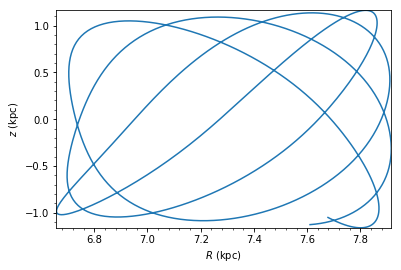

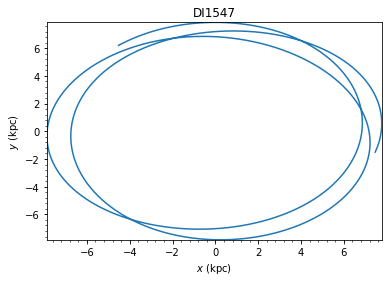

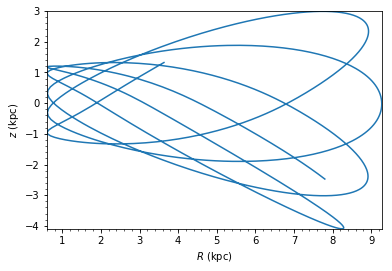

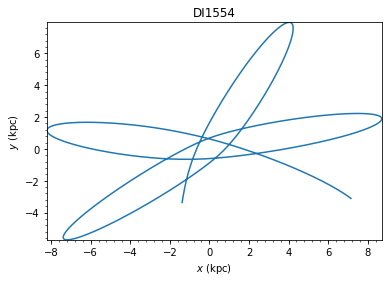

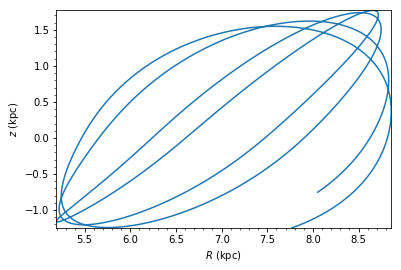

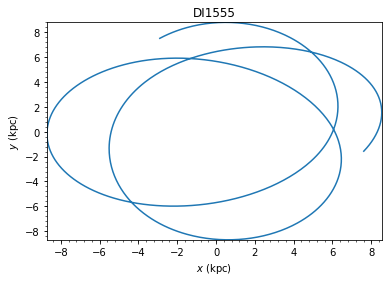

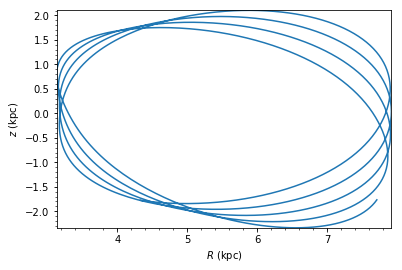

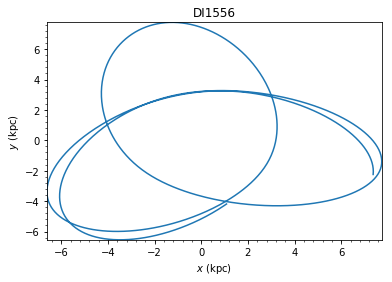

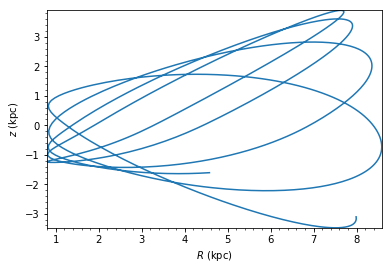

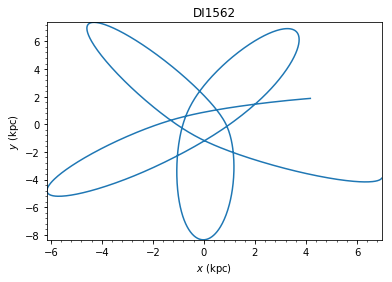

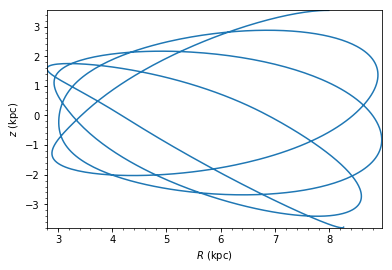

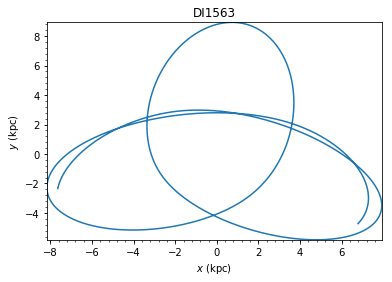

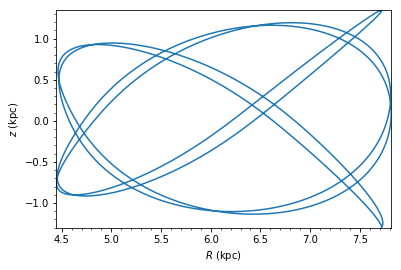

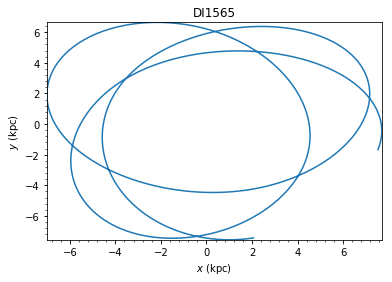

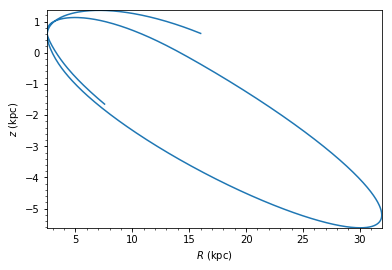

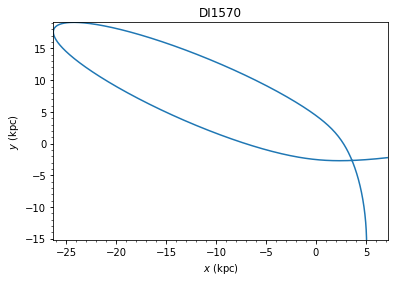

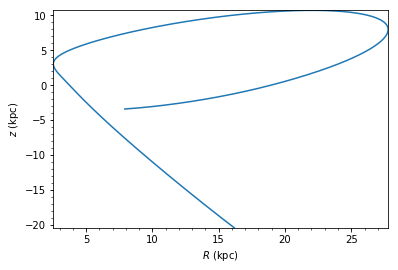

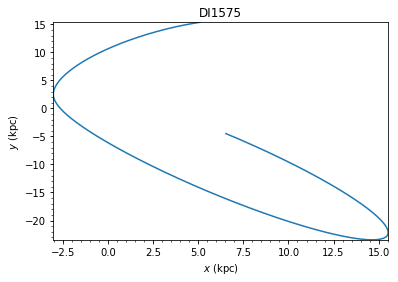

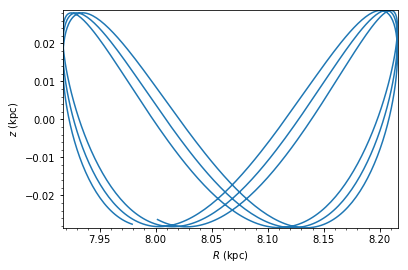

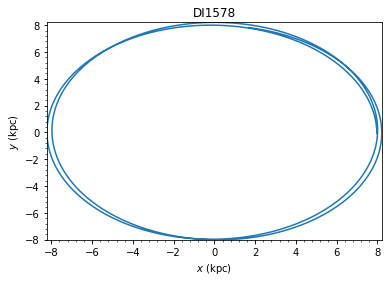

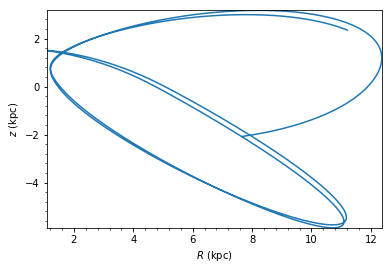

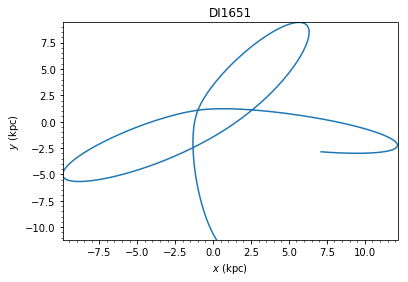

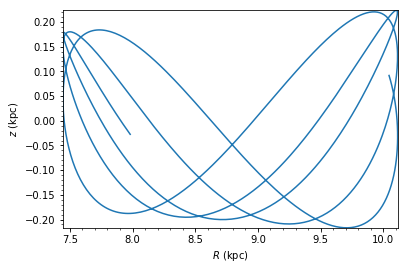

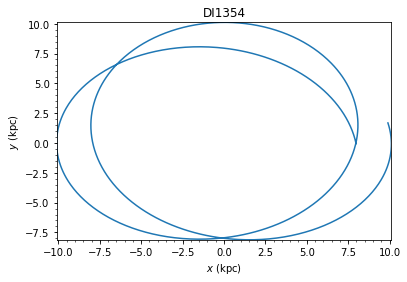

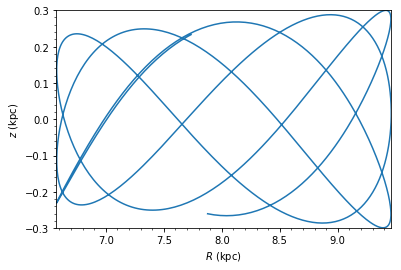

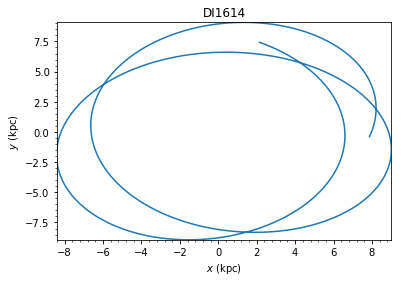

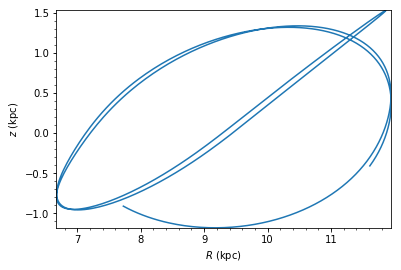

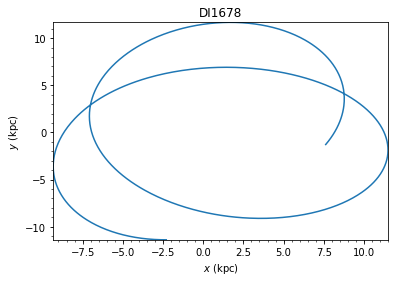

In [6]:
#plot orbits
#tried to extract the orbit but could not figure it out

orbR = [] #a
orbPhi = [] #b
orbZ = [] #c
orbvR = [] #d
orbvPhi = [] #e
orbvZ = [] #f
orbparams = []

ts = np.linspace(0,500,1000)*u.Myr #Evolve for 500 Myr with 1000 timesteps or point every 500,000 years

for i in range(len(heir)):
    orb=Orbit(vxvv=[heir['RA'][i],heir['DEC'][i],np.reciprocal(heir['parallax'][i]+0.052),heir['pmra'][i],\
                    heir['pmdec'][i],heir['VHELIO'][i]],radec=True)
    orb.integrate(ts,MWPotential2014,method='rk4_c')
    orb.plot(use_physical=True,label='{}'.format(heir['NAME'][i])) #use_physical=True
    #plt.legend(loc='upper right')
    orb.plot(d1='x',d2='y',use_physical=True,label='{}'.format(heir['NAME'][i]))
    plt.title('{}'.format(heir['NAME'][i]))
    #plt.legend(loc='upper right')
    orbparams.append([heir['NAME'][i],orb.e(),orb.rperi(),orb.rap(),orb.zmax()])
    #a, b, c, d, e, f = orb.getOrbit().T
    #orbR.append(a)
    #orbPhi.append(b)
    #orbZ.append(c)
    #orbvR.append(d)
    #orbvPhi.append(e)
    #orbvZ.append(f)

In [7]:
#create a table of the orbit parameters
nom = []
ecc = []
per = []
apo = []
zma = []
params  = Table()

for i in range(len(orbparams)):
    nom.append(orbparams[i][0])
    ecc.append(orbparams[i][1])
    per.append(orbparams[i][2])
    apo.append(orbparams[i][3])
    zma.append(orbparams[i][4])

params['NAME'] = nom
params['ECCENTRICITY'] = ecc
params['PERIGALACTICON'] = per
params['APOGALACTICON'] = apo
params['ZMAX'] = zma 

params.show_in_notebook()

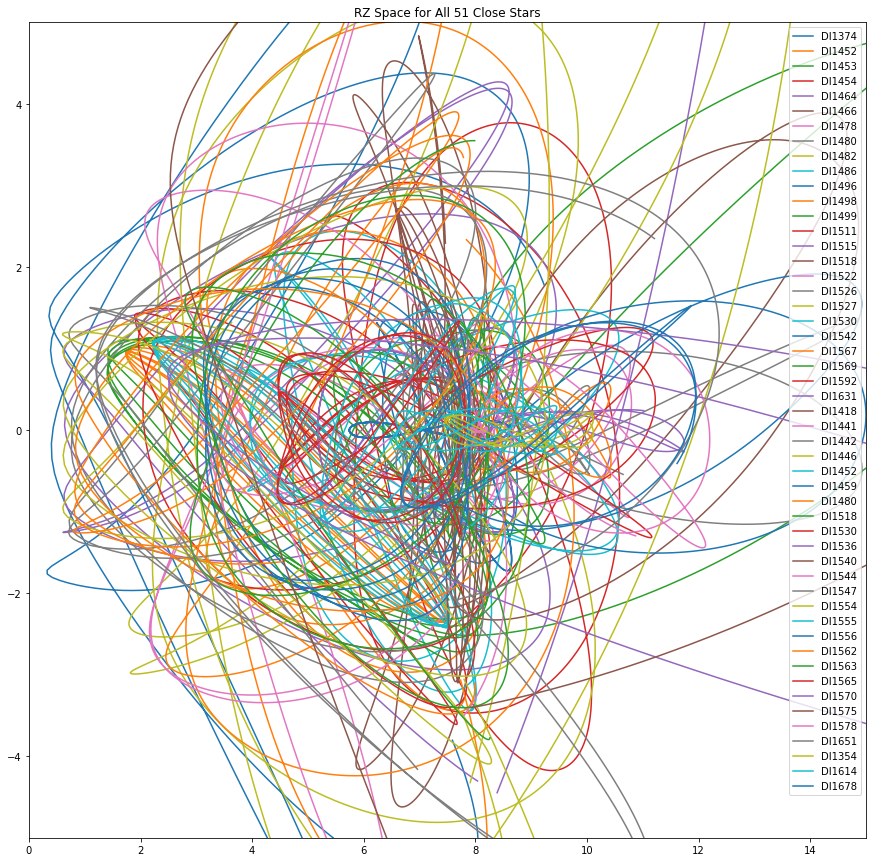

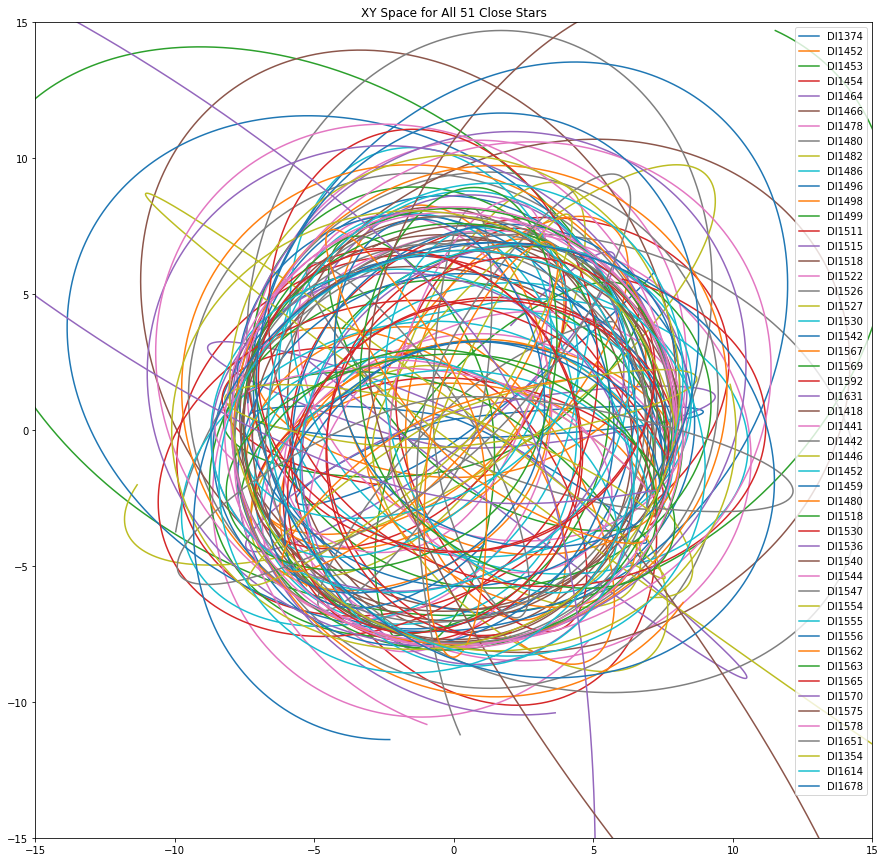

In [21]:
#Combine all orbit RZ and XY plots 
ts = np.linspace(0,500,1000)*u.Myr #Evolve for 500 Myr with 1000 timesteps or point every 500,000 years

plt.figure(figsize=(15,15))
for i in range(len(heir)):
    orb=Orbit(vxvv=[heir['RA'][i],heir['DEC'][i],np.reciprocal(heir['parallax'][i]+0.052),heir['pmra'][i],\
                    heir['pmdec'][i],heir['VHELIO'][i]],radec=True)
    orb.integrate(ts,MWPotential2014,method='rk4_c')
    orb.plot(use_physical=True,overplot=True,label='{}'.format(heir['NAME'][i]))
plt.legend(loc='upper right',fontsize=10)
plt.xlim(0,15)
plt.ylim(-5,5)
plt.title(r'RZ Space for All 51 Close Stars')
plt.show()

plt.figure(figsize=(15,15))
for i in range(len(heir)):
    orb=Orbit(vxvv=[heir['RA'][i],heir['DEC'][i],np.reciprocal(heir['parallax'][i]+0.052),heir['pmra'][i],\
                    heir['pmdec'][i],heir['VHELIO'][i]],radec=True)
    orb.integrate(ts,MWPotential2014,method='rk4_c')
    orb.plot(d1='x',d2='y',use_physical=True,overplot=True,label='{}'.format(heir['NAME'][i]))
plt.legend(loc='upper right',fontsize=10)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title(r'XY Space for All 51 Close Stars')
plt.show()